In [16]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# fetch dataset 
air_quality = fetch_ucirepo(id=1) 

X = air_quality.data.features 
y = air_quality.data.targets 


In [52]:
X.shape, y.shape

((4177, 8), (4177, 1))

Sex                  Axes(0.125,0.798085;0.168478x0.0819149)
Length            Axes(0.327174,0.798085;0.168478x0.0819149)
Diameter          Axes(0.529348,0.798085;0.168478x0.0819149)
Height            Axes(0.731522,0.798085;0.168478x0.0819149)
Whole_weight         Axes(0.125,0.699787;0.168478x0.0819149)
Shucked_weight    Axes(0.327174,0.699787;0.168478x0.0819149)
Viscera_weight    Axes(0.529348,0.699787;0.168478x0.0819149)
Shell_weight      Axes(0.731522,0.699787;0.168478x0.0819149)
dtype: object

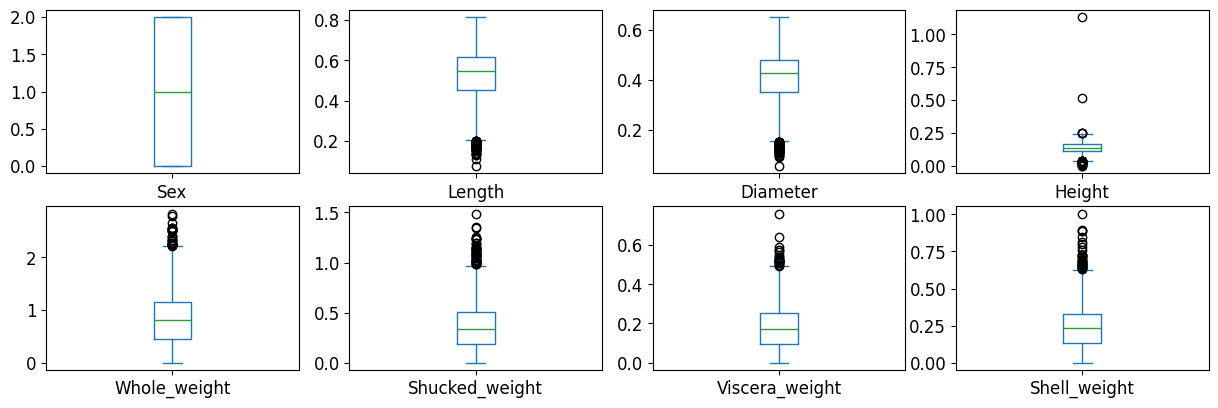

In [18]:
data_mean = X.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20))

In [20]:
le = LabelEncoder()
data_mean['Sex'] = le.fit_transform(data_mean['Sex'])

<Axes: >

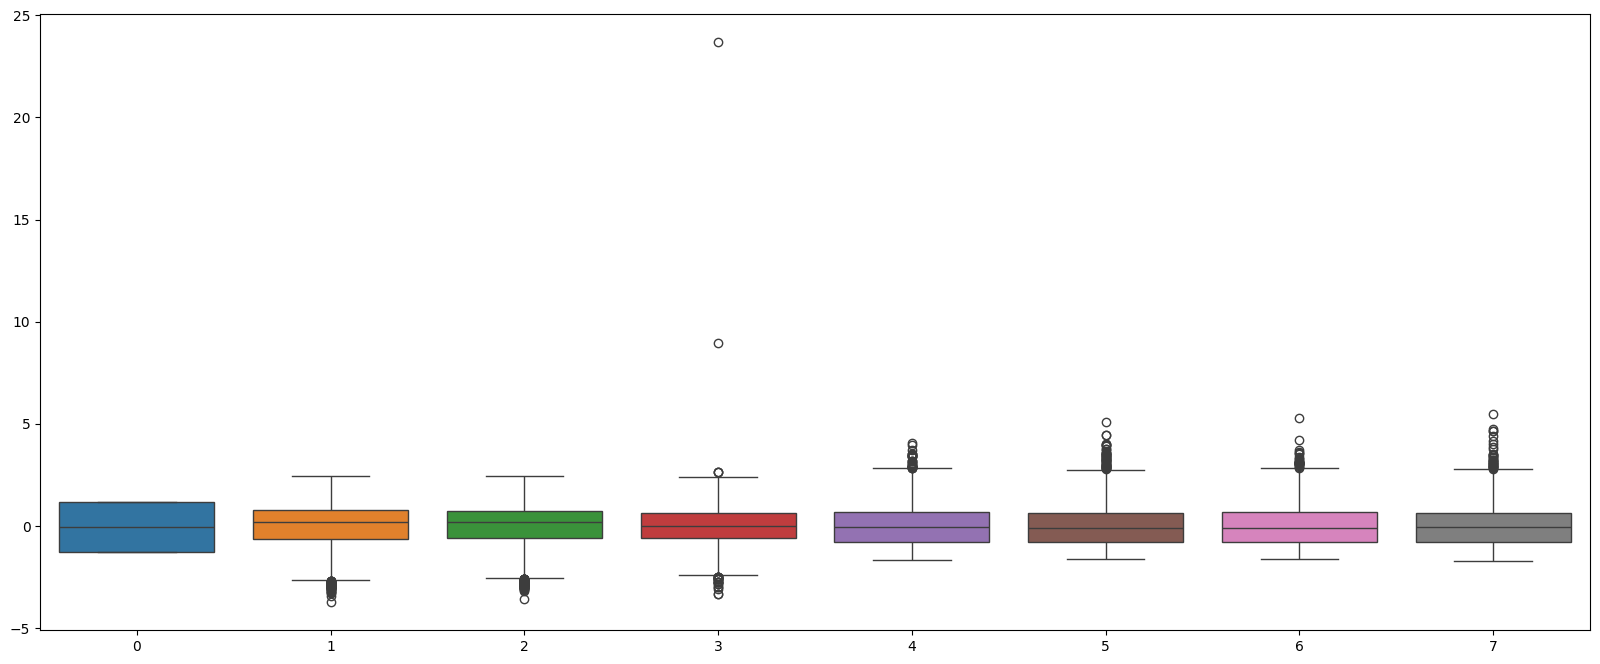

In [21]:
scaler = StandardScaler()
Xs = scaler.fit_transform(data_mean)

# Print features normalised (Xs)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)

In [26]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y.values.ravel(), test_size=0.2, random_state=1)

pca = PCA(n_components=6)
pca.fit(Xs_train)

Xs_train = pca.transform(Xs_train)
Xs_test = pca.transform(Xs_test)

In [37]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model.fit(Xs_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = svr_model.predict(Xs_test)
r2 = r2_score(y_test, y_pred)
print('Test MSE: ', mean_squared_error(y_test, y_pred))
print(f"R-squared: {r2}")

Test MSE:  4.86433203240882
R-squared: 0.5032054179192038
